# Exploratory Data Analysis

### Getting ready

Importing libraries

In [ ]:
import sys; sys.path.insert(0, '../src')

In [140]:
import pandas as pd
from IPython.display import display, Image
from eda_utils import display_books_info
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Loading the dataset

In [28]:
df = pd.read_csv(r'..\datasets\preprocessed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41617 entries, 0 to 41616
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            41617 non-null  object 
 1   title             41617 non-null  object 
 2   series            20420 non-null  object 
 3   author            41617 non-null  object 
 4   rating            41617 non-null  float64
 5   description       41617 non-null  object 
 6   language          41617 non-null  object 
 7   isbn              41617 non-null  object 
 8   genres            41617 non-null  object 
 9   characters        41617 non-null  object 
 10  bookFormat        41234 non-null  object 
 11  edition           3773 non-null   object 
 12  pages             40464 non-null  object 
 13  publisher         39307 non-null  object 
 14  publishDate       41298 non-null  object 
 15  firstPublishDate  25401 non-null  object 
 16  awards            41617 non-null  object

In [3]:
df.head().T

,0,1,2,3,4
bookId,2767052-the-hunger-games,2.Harry_Potter_and_the_Order_of_the_Phoenix,2657.To_Kill_a_Mockingbird,1885.Pride_and_Prejudice,41865.Twilight
title,The Hunger Games,Harry Potter and the Order of the Phoenix,To Kill a Mockingbird,Pride and Prejudice,Twilight
series,The Hunger Games #1,Harry Potter #5,To Kill a Mockingbird,NaN,The Twilight Saga #1
author,Suzanne Collins,"J.K. Rowling, Mary GrandPré (Illustrator)",Harper Lee,"Jane Austen, Anna Quindlen (Introduction)",Stephenie Meyer
rating,4.33,4.5,4.28,4.26,3.6
description,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,There is a door at the end of a silent corrido...,The unforgettable novel of a childhood in a sl...,Alternate cover edition of ISBN 9780679783268S...,About three things I was absolutely positive.\...
language,English,English,English,English,English
isbn,9780439023481,9780439358071,9999999999999,9999999999999,9780316015844
genres,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Classics', 'Fiction', 'Historical Fiction', ...","['Classics', 'Fiction', 'Romance', 'Historical...","['Young Adult', 'Fantasy', 'Romance', 'Vampire..."
characters,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R..."


Function from [eda_utils.py](../src/eda_utils.py) that displays info about book(s)

In [4]:
display_books_info(df.head(1))

Title: The Hunger Games
Author: Suzanne Collins
Pages: 374
Link: https://www.goodreads.com/book/show/2767052-the-hunger-games


### Most popular books

In [5]:
display_books_info(df.sort_values(by='numRatings', ascending=False).head())

Title: Harry Potter and the Sorcerer's Stone
Author: J.K. Rowling, Mary GrandPré (Illustrator)
Pages: 309
Link: https://www.goodreads.com/book/show/3.Harry_Potter_and_the_Sorcerer_s_Stone




Title: The Hunger Games
Author: Suzanne Collins
Pages: 374
Link: https://www.goodreads.com/book/show/2767052-the-hunger-games




Title: Twilight
Author: Stephenie Meyer
Pages: 501
Link: https://www.goodreads.com/book/show/41865.Twilight




Title: To Kill a Mockingbird
Author: Harper Lee
Pages: 324
Link: https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird




Title: The Great Gatsby
Author: F. Scott Fitzgerald, Francis Scott Fitzgerald
Pages: 200
Link: https://www.goodreads.com/book/show/4671.The_Great_Gatsby


### Most rated books

In [6]:
display_books_info(df.sort_values(by='bbeScore', ascending=False).head())

Title: The Hunger Games
Author: Suzanne Collins
Pages: 374
Link: https://www.goodreads.com/book/show/2767052-the-hunger-games




Title: Harry Potter and the Order of the Phoenix
Author: J.K. Rowling, Mary GrandPré (Illustrator)
Pages: 870
Link: https://www.goodreads.com/book/show/2.Harry_Potter_and_the_Order_of_the_Phoenix




Title: To Kill a Mockingbird
Author: Harper Lee
Pages: 324
Link: https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird




Title: Pride and Prejudice
Author: Jane Austen, Anna Quindlen (Introduction)
Pages: 279
Link: https://www.goodreads.com/book/show/1885.Pride_and_Prejudice




Title: Twilight
Author: Stephenie Meyer
Pages: 501
Link: https://www.goodreads.com/book/show/41865.Twilight


### Most popular author

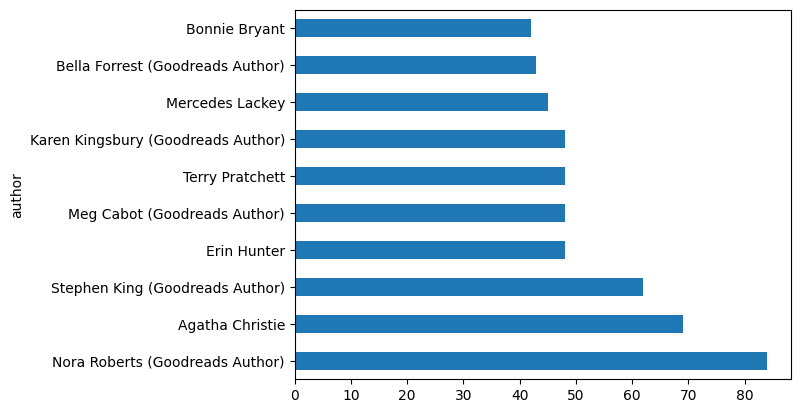

In [7]:
df.groupby('author')['title'].count().sort_values(ascending=False).head(10).plot.barh();

### Most successful author

In [113]:
df['author_split'] = df['author'].str.split(', ')

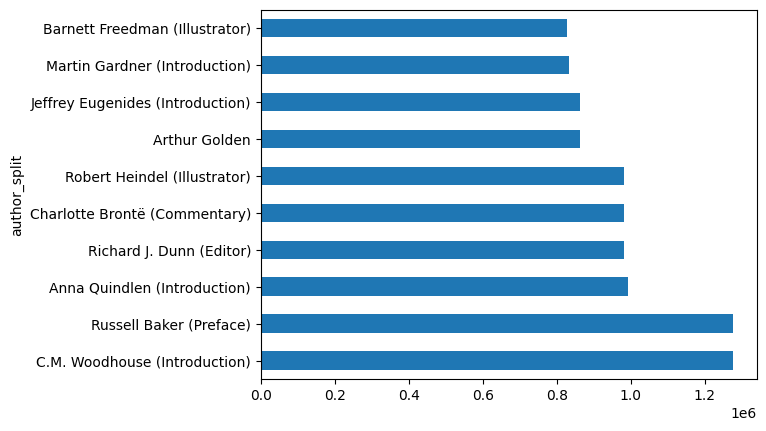

In [114]:
df.explode('author_split').groupby('author_split')['bbeScore'].mean().sort_values(ascending=False).head(10).plot.barh();

Books with most pages

In [11]:
display_books_info(df.sort_values(by='pages', ascending=False).head())

Title: The Marx Sisters: A Kathy Kolla and David Brock Mystery
Author: Barry Maitland
Pages: 999
Link: https://www.goodreads.com/book/show/19377118-the-marx-sisters




Title: The Wise Man's Fear
Author: Patrick Rothfuss (Goodreads Author)
Pages: 994
Link: https://www.goodreads.com/book/show/1215032.The_Wise_Man_s_Fear




Title: A Breath of Snow and Ashes
Author: Diana Gabaldon (Goodreads Author)
Pages: 993
Link: https://www.goodreads.com/book/show/10965.A_Breath_of_Snow_and_Ashes




Title: The Ball is Round: A Global History of Soccer
Author: David Goldblatt
Pages: 992
Link: https://www.goodreads.com/book/show/1270311.The_Ball_is_Round




Title: The Braided Path
Author: Chris Wooding
Pages: 992
Link: https://www.goodreads.com/book/show/906015.The_Braided_Path


### Oldest books

In [29]:
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')

C:\Users\Ruslan\AppData\Local\Temp\ipykernel_10316\9840708.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')


In [43]:
display_books_info(df.sort_values(by='firstPublishDate').head(), include_cols=['firstPublishDate'])

Title: The Battle of the Books
Author: Jonathan Swift
Pages: nan
Firstpublishdate: 1704-01-01 00:00:00
Link: https://www.goodreads.com/book/show/1069174.The_Battle_of_the_Books




Title: A Journal of the Plague Year
Author: Daniel Defoe, Cynthia Sundberg Wall (Editor), Anthony Burgess (Introduction)
Pages: 336
Firstpublishdate: 1722-03-01 00:00:00
Link: https://www.goodreads.com/book/show/46730.A_Journal_of_the_Plague_Year




Title: Pamela
Author: Samuel Richardson, Thomas Keymer (Editor), Alice Wakely (Editor)
Pages: 592
Firstpublishdate: 1740-01-01 00:00:00
Link: https://www.goodreads.com/book/show/417549.Pamela




Title: Religious Affections
Author: Jonathan Edwards
Pages: 319
Firstpublishdate: 1746-01-01 00:00:00
Link: https://www.goodreads.com/book/show/2294388.Religious_Affections




Title: The Major Works
Author: Alexander Pope, Pat Rogers (Editor)
Pages: 737
Firstpublishdate: 1751-01-01 00:00:00
Link: https://www.goodreads.com/book/show/6342335-the-major-works


### Most books by year

In [38]:
df['year'] = df['firstPublishDate'].dt.year

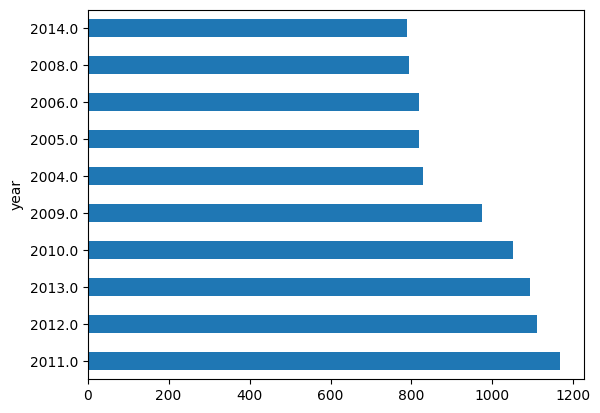

In [39]:
df.groupby('year')['title'].count().sort_values(ascending=False).head(10).plot.barh();

### Most popular genre

In [44]:
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))

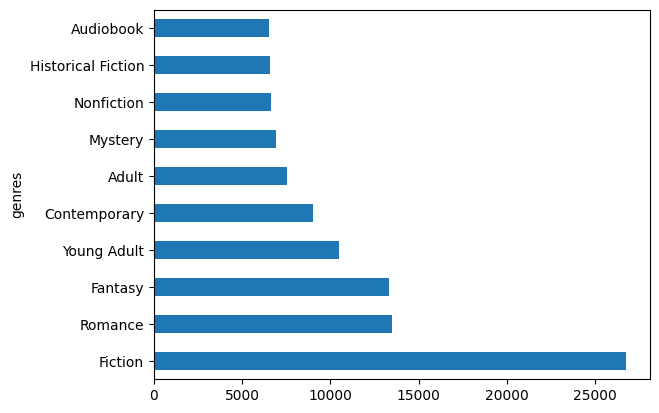

In [47]:
df.explode('genres').groupby('genres')['title'].count().sort_values(ascending=False).head(10).plot.barh();

### Most popular genre by year

In [111]:
df.explode('genres').groupby('year')['genres'].value_counts().sort_values(ascending=False).reset_index().drop_duplicates(subset=['year']).head(20).drop(labels=['count'], axis=1).set_index(keys=['year'])

,genres
year,
2011.0,Fiction
2010.0,Fiction
2009.0,Fiction
2012.0,Fiction
2004.0,Fiction
2005.0,Fiction
2006.0,Fiction
2013.0,Fiction
2003.0,Fiction


### Most popular author by year

In [115]:
df.explode('author_split').groupby('year')['author_split'].value_counts().sort_values(ascending=False).reset_index().drop_duplicates(subset=['year']).head(20).drop(labels=['count'], axis=1).set_index(keys=['year'])

,author_split
year,
2011.0,Pet Torres (Goodreads Author)
2004.0,William Flanagan (Translator)
1991.0,L.J. Smith (Goodreads Author)
2007.0,more…
2006.0,William Flanagan (Translator)
2009.0,Allan Frewin Jones
2013.0,more…
2023.0,William Shakespeare
2002.0,Akira Watanabe (Translator)


### Most expensive books

In [118]:
display_books_info(df.sort_values(by='price', ascending=False).head(), include_cols=['price'])

Title: One Piece Box Set 2: Skypeia and Water Seven: Volumes 24-46 with Premium
Author: Eiichiro Oda
Pages: 4936
Price: 99.96
Link: https://www.goodreads.com/book/show/21412246-one-piece-box-set-2




Title: Things Never To Call Your Wife: Porky, Meatloaf, Big Bum
Author: Carhamel D. Chesecake (Goodreads Author)
Pages: 424
Price: 99.51
Link: https://www.goodreads.com/book/show/40604020-things-never-to-call-your-wife




Title: Commentary on the Creed of At-Tahawi: Sharh Al-'Aqidah At-Tahawiyyah
Author: Ibn Abil-'Izz al-Hanafee, Muhammad Abdul-Haqq Ansari (Translator)
Pages: 538
Price: 99.26
Link: https://www.goodreads.com/book/show/766196.Commentary_on_the_Creed_of_At_Tahawi




Title: Monster Hunter International
Author: Larry Correia
Pages: 457
Price: 99.20
Link: https://www.goodreads.com/book/show/2570856-monster-hunter-international




Title: Small Trades
Author: Irving Penn
Pages: 272
Price: 98.97
Link: https://www.goodreads.com/book/show/6858346-small-trades


### Most popular book characters

In [121]:
df['characters'] = df['characters'].apply(lambda x: ast.literal_eval(x))

In [170]:
text = " ".join(df.explode('characters').groupby('characters')['title'].count().sort_values(ascending=False).iloc[:100].reset_index()['characters'].str.replace(" ", "_").to_list())

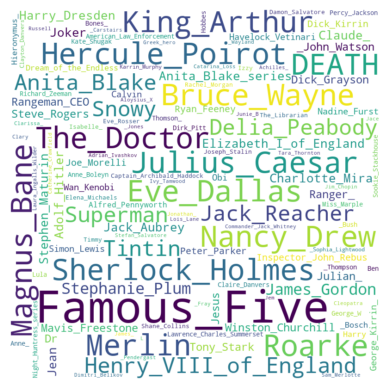

In [172]:
wc = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()